In [1]:
import timeit
import random
import numpy
import matplotlib as mpl
import matplotlib.pyplot as plt
from typing import List

In [2]:
def generate_list(n: int) -> List:
    return [random.randint(0, n) for i in range(n)]

In [3]:
def oddEvenSort(array: List) -> List:
    arr_len = len(array)

    for i in range(arr_len):
        start_point = 0 if i % 2 == 0 else 1
        for j in range(start_point, arr_len - 1, 2):
            if array[j] > array[j+1]:
                array[j], array[j+1] = array[j+1], array[j]
    
    return array

In [4]:
def speed_tester() -> List:
    speed = []
    for i in range(1_000, 11_000, 1_000):
        arr = generate_list(i)
        speed.append(timeit.Timer(lambda: oddEvenSort(arr)).repeat(10, 1))
        print(f"{len(arr)} - done")
    
    return speed

In [5]:
speed = speed_tester()
speed

1000 - done
2000 - done
3000 - done
4000 - done
5000 - done
6000 - done
7000 - done
8000 - done
9000 - done
10000 - done


[[0.04511319997254759,
  0.027600999921560287,
  0.02707019995432347,
  0.027110000024549663,
  0.026926000020466745,
  0.027204100042581558,
  0.026910999906249344,
  0.027023299946449697,
  0.02650419995188713,
  0.02647319994866848],
 [0.1722111999988556,
  0.11066829995252192,
  0.11047230008989573,
  0.1088111000135541,
  0.10833089996594936,
  0.10889839997980744,
  0.11013559997081757,
  0.10876869992353022,
  0.10823250003159046,
  0.12103699997533113],
 [0.41263529995922,
  0.2550412999698892,
  0.2504260999849066,
  0.2558974999701604,
  0.27956329996231943,
  0.25098760006949306,
  0.251946400036104,
  0.253527499968186,
  0.26236459997016937,
  0.2611097999615595],
 [0.778687100042589,
  0.4512855999637395,
  0.44481739995535463,
  0.44378129998221993,
  0.4594194000819698,
  0.45213170000351965,
  0.45098910003434867,
  0.4421186000108719,
  0.44146520004142076,
  0.4397807000204921],
 [1.2298320999834687,
  0.7282529999502003,
  0.7237908000824973,
  0.7278387000551447,
 

In [6]:
np_arr = numpy.array(speed)
np_arr

array([[0.0451132, 0.027601 , 0.0270702, 0.02711  , 0.026926 , 0.0272041,
        0.026911 , 0.0270233, 0.0265042, 0.0264732],
       [0.1722112, 0.1106683, 0.1104723, 0.1088111, 0.1083309, 0.1088984,
        0.1101356, 0.1087687, 0.1082325, 0.121037 ],
       [0.4126353, 0.2550413, 0.2504261, 0.2558975, 0.2795633, 0.2509876,
        0.2519464, 0.2535275, 0.2623646, 0.2611098],
       [0.7786871, 0.4512856, 0.4448174, 0.4437813, 0.4594194, 0.4521317,
        0.4509891, 0.4421186, 0.4414652, 0.4397807],
       [1.2298321, 0.728253 , 0.7237908, 0.7278387, 0.723951 , 0.7265232,
        0.717667 , 0.7018824, 0.6977437, 0.7003916],
       [1.5820196, 1.0041934, 1.0059966, 1.0052012, 1.0065133, 1.0045775,
        1.0040889, 1.0024726, 1.0033002, 1.0104084],
       [2.2280541, 1.4238251, 1.4270724, 1.4199316, 1.4216261, 1.4270418,
        1.4120074, 1.3948977, 1.4005121, 1.3884884],
       [2.8159965, 1.8505217, 1.8575462, 1.8493867, 1.8499833, 1.8544051,
        1.8607413, 1.8491034, 1.85686

In [7]:
np_average = numpy.mean(np_arr, axis=1)
np_average

array([0.02879362, 0.1167566 , 0.27334994, 0.48044761, 0.76778735,
       1.06287717, 1.49434567, 1.95118717, 2.50948632, 3.15625503])

In [8]:
np_std = numpy.std(np_arr, axis=1)
np_std

array([0.00544862, 0.01883155, 0.04714438, 0.09958186, 0.15443707,
       0.17305995, 0.24492086, 0.28832295, 0.37167899, 0.42115475])

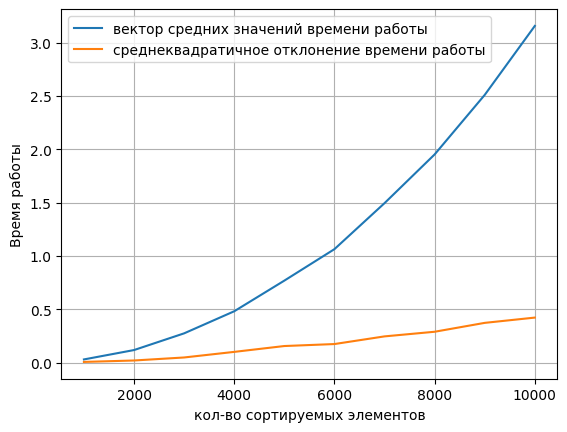

In [10]:
ax = plt.subplot()

x_line = range(1_000, 11_000, 1_000)

ax.plot(x_line, np_average, label="вектор средних значений времени работы")
ax.plot(x_line, np_std, label="среднеквадратичное отклонение времени работы")

ax.set_xlabel("кол-во сортируемых элементов")
ax.set_ylabel("Время работы")
ax.legend()
ax.grid()